[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pytosha/new-python-repo/blob/main/Lesson3/notebooks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф".
* Cохранить результаты в pandas dataframe.
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных.
-- Проверить индекс, чтобы он соответствовал порядку строк.
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки (например, заменить медианой, 0, -99999, удалить наблюдения с пропусками).
*
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
-- Визуализировать разброс, связь и распределение этих показателей по регионам.
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [2]:
#Загрузка DataFrame из файла .pkl
df = pd.read_pickle("C:\Users\79525\Desktop\Sber_DS\01_Python_Levchenko\df_pickle.pkl")

In [3]:
df.head (10)

,errcode,data.id,data.hobjId,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,...,data.metro.colors,data.transportDistIndex,data.transportDistIndexValue,data.complexShortNm,data.airQualityIndexValue,data.greenAreaIndexValue,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm
0,0,13399,34754,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13391,37219,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13383,39024,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13398,37165,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13397,37201,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,10891,6541,23054,3006,ААК ВОЛОГДААГРОСТРОЙ,ААК ВОЛОГДААГРОСТРОЙ,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,56006,136720,795065,3980,АВАЛОН,АВАЛОН,АВАЛОН,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,30292,115751,120396,7699,АВАЛОН СИТИ,АВАЛОН СИТИ,АВАЛОН СИТИ,0,1,...,[#CD0505],6 / 10,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,18709,26010,44330,3812,АВИГРАН,АВИГРАН,АВИГРАН,0,2,...,NaN,NaN,NaN,ЖК Новое Лыткарино,6.0,NaN,NaN,NaN,NaN,NaN
0,0,18708,36235,44330,3812,АВИГРАН,АВИГРАН,АВИГРАН,0,2,...,NaN,NaN,NaN,ЖК Новое Лыткарино,6.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Выводим названия всех столбцов
list (df.columns)

['errcode',
 'data.id',
 'data.hobjId',
 'data.pdId',
 'data.developer.devId',
 'data.developer.devShortCleanNm',
 'data.developer.devShortNm',
 'data.developer.devFullCleanNm',
 'data.developer.problObjCnt',
 'data.developer.buildObjCnt',
 'data.developer.comissObjCnt',
 'data.developer.regRegionDesc',
 'data.developer.devPhoneNum',
 'data.developer.devSite',
 'data.developer.devEmail',
 'data.developer.devInn',
 'data.developer.devOgrn',
 'data.developer.devKpp',
 'data.developer.devLegalAddr',
 'data.developer.devFactAddr',
 'data.developer.lastRpdId',
 'data.developer.fundGuarantyFlg',
 'data.developer.devOrgRegRegionCd',
 'data.developer.devEmplMainFullNm',
 'data.developer.developerGroupName',
 'data.developer.orgForm.id',
 'data.developer.orgForm.fullForm',
 'data.developer.orgForm.shortForm',
 'data.developer.companyGroupId',
 'data.developer.objGuarantyEscrowFlg',
 'data.developer.govFundFlg',
 'data.region',
 'data.address',
 'data.floorMin',
 'data.floorMax',
 'data.objElemL

In [5]:
# Соберем нужные нам столбцы
data_col= []
data_col.extend(['data.id', 'data.region', 'data.developer.regRegionDesc' ,'data.address', 'data.nameObj'])
data_col.extend(['data.objSquareLiving', 'data.objReady100PercDt', 'data.objElemParkingCnt'])
data_col.extend(['data.objLkClassDesc', 'data.objFlatCnt', 'data.objFloorCnt', 'data.infrastructureIndexValue', 'data.objInfrstrObjPrkngCnt'])
data_col.extend(['data.floorMin', 'data.floorMax', 'data.metro.isWalk', 'data.metro.time'])
data_col.extend(['data.objPriceAvg', 'data.soldOutPerc', 'data.transportDistIndexValue'])
df_slice = df[data_col]
df_slice.head()

,data.id,data.region,data.developer.regRegionDesc,data.address,data.nameObj,data.objSquareLiving,data.objReady100PercDt,data.objElemParkingCnt,data.objLkClassDesc,data.objFlatCnt,data.objFloorCnt,data.infrastructureIndexValue,data.objInfrstrObjPrkngCnt,data.floorMin,data.floorMax,data.metro.isWalk,data.metro.time,data.objPriceAvg,data.soldOutPerc,data.transportDistIndexValue
0,13399,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,0.00,2024-12-31,125,Элитный,0,1,10,0.0,1,1,NaN,NaN,50768.0,0.917243,NaN
0,13391,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,4343.90,2023-12-31,41,Элитный,44,12,10,0.0,3,12,NaN,NaN,62638.0,0.520845,NaN
0,13383,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,6423.85,2023-12-31,36,Элитный,68,20,10,0.0,4,20,NaN,NaN,67159.0,0.572803,NaN
0,13398,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,4812.98,2024-12-31,0,Элитный,43,10,10,4.0,7,10,NaN,NaN,47886.0,1.000000,NaN
0,13397,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,6251.10,2024-12-31,0,Элитный,65,12,10,11.0,6,12,NaN,NaN,47163.0,0.999984,NaN


In [6]:
#скачаем названия регионов и добавим в df

url_region = 'https://github.com/hflabs/region/raw/master/region.csv'
res = requests.get(url_region)
data_region = res.text
with open('region.csv', 'w+', encoding='utf-8') as file:
    file.write(data_region)

In [7]:
df_r = pd.read_csv("C:\Users\79525\Desktop\Sber_DS\01_Python_Levchenko\region.csv")

In [8]:
df_r.head(10)

,name,type,name_with_type,federal_district,kladr_id,fias_id,okato,oktmo,tax_office,postal_code,iso_code,timezone,geoname_code,geoname_id,geoname_name
0,Адыгея,Респ,Респ Адыгея,Южный,100000000000,d8327a56-80de-4df2-815c-4f6ab1224c50,79000000000,79000000,100,385000.0,RU-AD,UTC+3,RU.01,584222,Adygeya Republic
1,Башкортостан,Респ,Респ Башкортостан,Приволжский,200000000000,6f2cbfd8-692a-4ee4-9b16-067210bde3fc,80000000000,80000000,200,452000.0,RU-BA,UTC+5,RU.08,578853,Bashkortostan Republic
2,Бурятия,Респ,Респ Бурятия,Дальневосточный,300000000000,a84ebed3-153d-4ba9-8532-8bdf879e1f5a,81000000000,81000000,300,671000.0,RU-BU,UTC+8,RU.11,2050915,Buryatiya Republic
3,Алтай,Респ,Респ Алтай,Сибирский,400000000000,5c48611f-5de6-4771-9695-7e36a4e7529d,84000000000,84000000,400,649000.0,RU-AL,UTC+7,RU.03,1506272,Altai
4,Дагестан,Респ,Респ Дагестан,Северо-Кавказский,500000000000,0bb7fa19-736d-49cf-ad0e-9774c4dae09b,82000000000,82000000,500,368000.0,RU-DA,UTC+3,RU.17,567293,Dagestan
5,Ингушетия,Респ,Респ Ингушетия,Северо-Кавказский,600000000000,b2d8cd20-cabc-4deb-afad-f3c4b4d55821,26000000000,26000000,600,386000.0,RU-IN,UTC+3,RU.19,556349,Ingushetiya Republic
6,Кабардино-Балкарская,Респ,Кабардино-Балкарская Респ,Северо-Кавказский,700000000000,1781f74e-be4a-4697-9c6b-493057c94818,83000000000,83000000,700,NaN,RU-KB,UTC+3,RU.22,554667,Kabardino-Balkariya Republic
7,Калмыкия,Респ,Респ Калмыкия,Южный,800000000000,491cde9d-9d76-4591-ab46-ea93c079e686,85000000000,85000000,800,NaN,RU-KL,UTC+3,RU.24,553972,Kalmykiya Republic
8,Карачаево-Черкесская,Респ,Карачаево-Черкесская Респ,Северо-Кавказский,900000000000,61b95807-388a-4cb1-9bee-889f7cf811c8,91000000000,91000000,900,NaN,RU-KC,UTC+3,RU.27,552927,Karachayevo-Cherkesiya Republic
9,Карелия,Респ,Респ Карелия,Северо-Западный,1000000000000,248d8071-06e1-425e-a1cf-d1ff4c4a14a8,86000000000,86000000,1000,NaN,RU-KR,UTC+3,RU.28,552548,Karelia


In [9]:
# Добавление название региона в DataFrame
df_region = pd.read_csv('region.csv', sep=',')[['name_with_type', 'kladr_id']]
df_region['kladr_id'] = (df_region['kladr_id']/100000000000).astype('int64')
df_region.set_index('kladr_id', inplace=True)
df = pd.merge(df_slice, df_region, left_on='data.region', right_on=df_region.index)
df.rename(columns={'name_with_type':'name_region'}, inplace=True)
df['data.region'] = df['data.region'].astype('str')
df.sample(3)

,data.id,data.region,data.developer.regRegionDesc,data.address,data.nameObj,data.objSquareLiving,data.objReady100PercDt,data.objElemParkingCnt,data.objLkClassDesc,data.objFlatCnt,...,data.infrastructureIndexValue,data.objInfrstrObjPrkngCnt,data.floorMin,data.floorMax,data.metro.isWalk,data.metro.time,data.objPriceAvg,data.soldOutPerc,data.transportDistIndexValue,name_region
1304,54827,16,Татарстан Республика,"город Казань, ул Сабантуй",Дом блокированной застройки Жилой дом №1-В Бло...,148.06,2024-12-31,0,Комфорт,1,...,3,0.0,2,2,False,33.216667,NaN,NaN,NaN,Респ Татарстан
1788,43359,50,Московская область,г Балашиха,Жилой квартал Новоград Павлино/ЖК Новоград Пав...,21624.61,2024-06-30,0,Комфорт,548,...,7,77.0,13,23,NaN,NaN,197800.0,0.000963,NaN,Московская обл
8643,42852,27,Хабаровский край,"г Хабаровск, район Индустриальный р-н, переуло...","ЖК ""Культура.Классика""",31775.75,2024-09-30,234,Комфорт,573,...,8,133.0,3,25,NaN,NaN,142260.0,0.530558,NaN,Хабаровский край


In [10]:
# оставим только обьекты с известной ценой квадратного метра
df_price = df[df['data.objPriceAvg'].notnull()]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8088 entries, 0 to 11704
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data.id                        8088 non-null   int64  
 1   data.region                    8088 non-null   object 
 2   data.developer.regRegionDesc   8018 non-null   object 
 3   data.address                   8088 non-null   object 
 4   data.nameObj                   6465 non-null   object 
 5   data.objSquareLiving           8088 non-null   float64
 6   data.objReady100PercDt         8088 non-null   object 
 7   data.objElemParkingCnt         8088 non-null   int64  
 8   data.objLkClassDesc            8088 non-null   object 
 9   data.objFlatCnt                8088 non-null   int64  
 10  data.objFloorCnt               8088 non-null   int64  
 11  data.infrastructureIndexValue  8088 non-null   int64  
 12  data.objInfrstrObjPrkngCnt     8081 non-null   

# 1. Cредняя цена за кв.м по регионам

In [11]:
# Табличные данные
reg_avg = df_price[['name_region', 'data.objPriceAvg']].groupby('name_region').mean()
reg_avg

,data.objPriceAvg
name_region,
Алтайский край,87372.357143
Амурская обл,145182.166667
Архангельская обл,103082.739130
Астраханская обл,100834.300000
Белгородская обл,92121.162791
...,...
Ямало-Ненецкий АО,144591.076923
Ярославская обл,82661.880435
г Москва,380967.867089


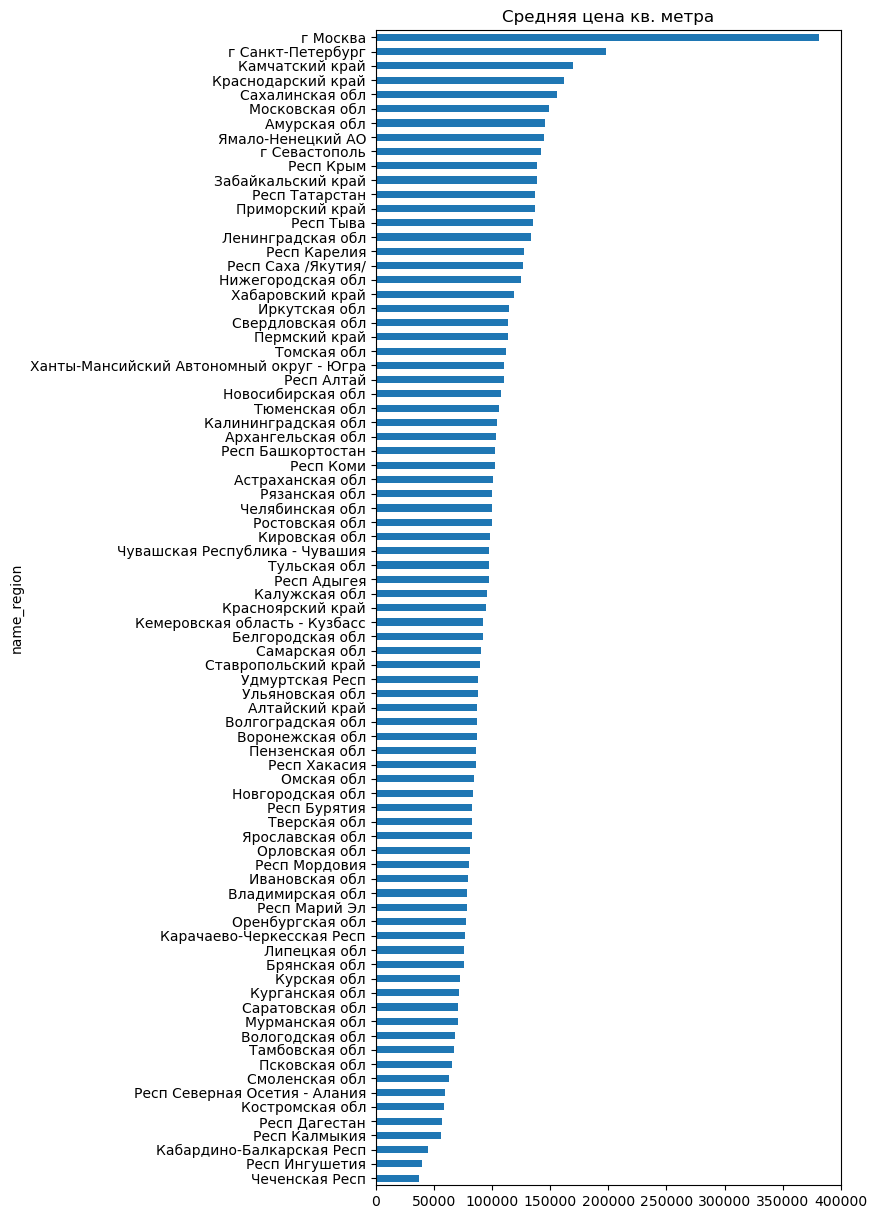

In [12]:
# Визуализация средней цены за кв. м по регионам
reg_avg.sort_values(by='data.objPriceAvg').plot(figsize=(6, 15), kind='barh', legend=False,
                                         xlabel='', title='Средняя цена кв. метра')
plt.show()

# 2. Средняя цена за кв.м по классу жилья

In [13]:
# Табличные данные
df_class_price = df[['name_region',
                           'data.objLkClassDesc',
                           'data.objPriceAvg']].groupby(['name_region', 
                                                    'data.objLkClassDesc']).mean().unstack()
df_class_price.columns = df_class_price.columns.get_level_values(1)
df_class_price.columns.name = None
df_class_price.sample(5)

,Бизнес,Другое,Комфорт,Типовой,Элитный
name_region,,,,,
Хабаровский край,148884.142857,NaN,122545.347826,109571.159091,NaN
Астраханская обл,115089.000000,NaN,102604.263158,19321.000000,NaN
Чувашская Республика - Чувашия,135971.000000,NaN,95845.812500,80057.173913,184502.555556
г Санкт-Петербург,242329.000000,NaN,182518.400722,171373.041667,372993.833333
г Севастополь,237014.000000,NaN,130293.375000,141092.000000,NaN


# 3. Объемы вводимого жилья по регионам и по годам.

In [14]:
# Объем введенного жилья по регионам по годам
build_speed = df[['name_region', 'data.objSquareLiving']]
build_speed['year'] = pd.to_datetime(df['data.objReady100PercDt'], yearfirst=True).dt.year
df_filter = (build_speed['year'] > 2021) & (build_speed['year'] < 2030)
build_speed = build_speed[df_filter].groupby(['name_region', 'year']).sum().reset_index()

/tmp/ipykernel_3880/1983992015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_speed['year'] = pd.to_datetime(df['data.objReady100PercDt'], yearfirst=True).dt.year


In [15]:
# Функции для интерактивности
def sns_plot(df, region1, region2):
    sns.relplot(
        x='year',
        y='data.objSquareLiving',
        hue='name_region',
        data=df[df['name_region'].isin([region1, region2])],
        kind='line',
        aspect=2
    )
    plt.title('Количество вводимого жилья по годам', size=20)
    plt.show()
    
    
def f2(region1, region2):
    sns_plot(build_speed, region1, region2)

In [16]:
# Интерактивное сравнение городов
interact(f2, region1=list(build_speed.name_region.unique()), region2=list(build_speed.name_region.unique()));

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


# 4. Распределение средней этажности домов по регионам

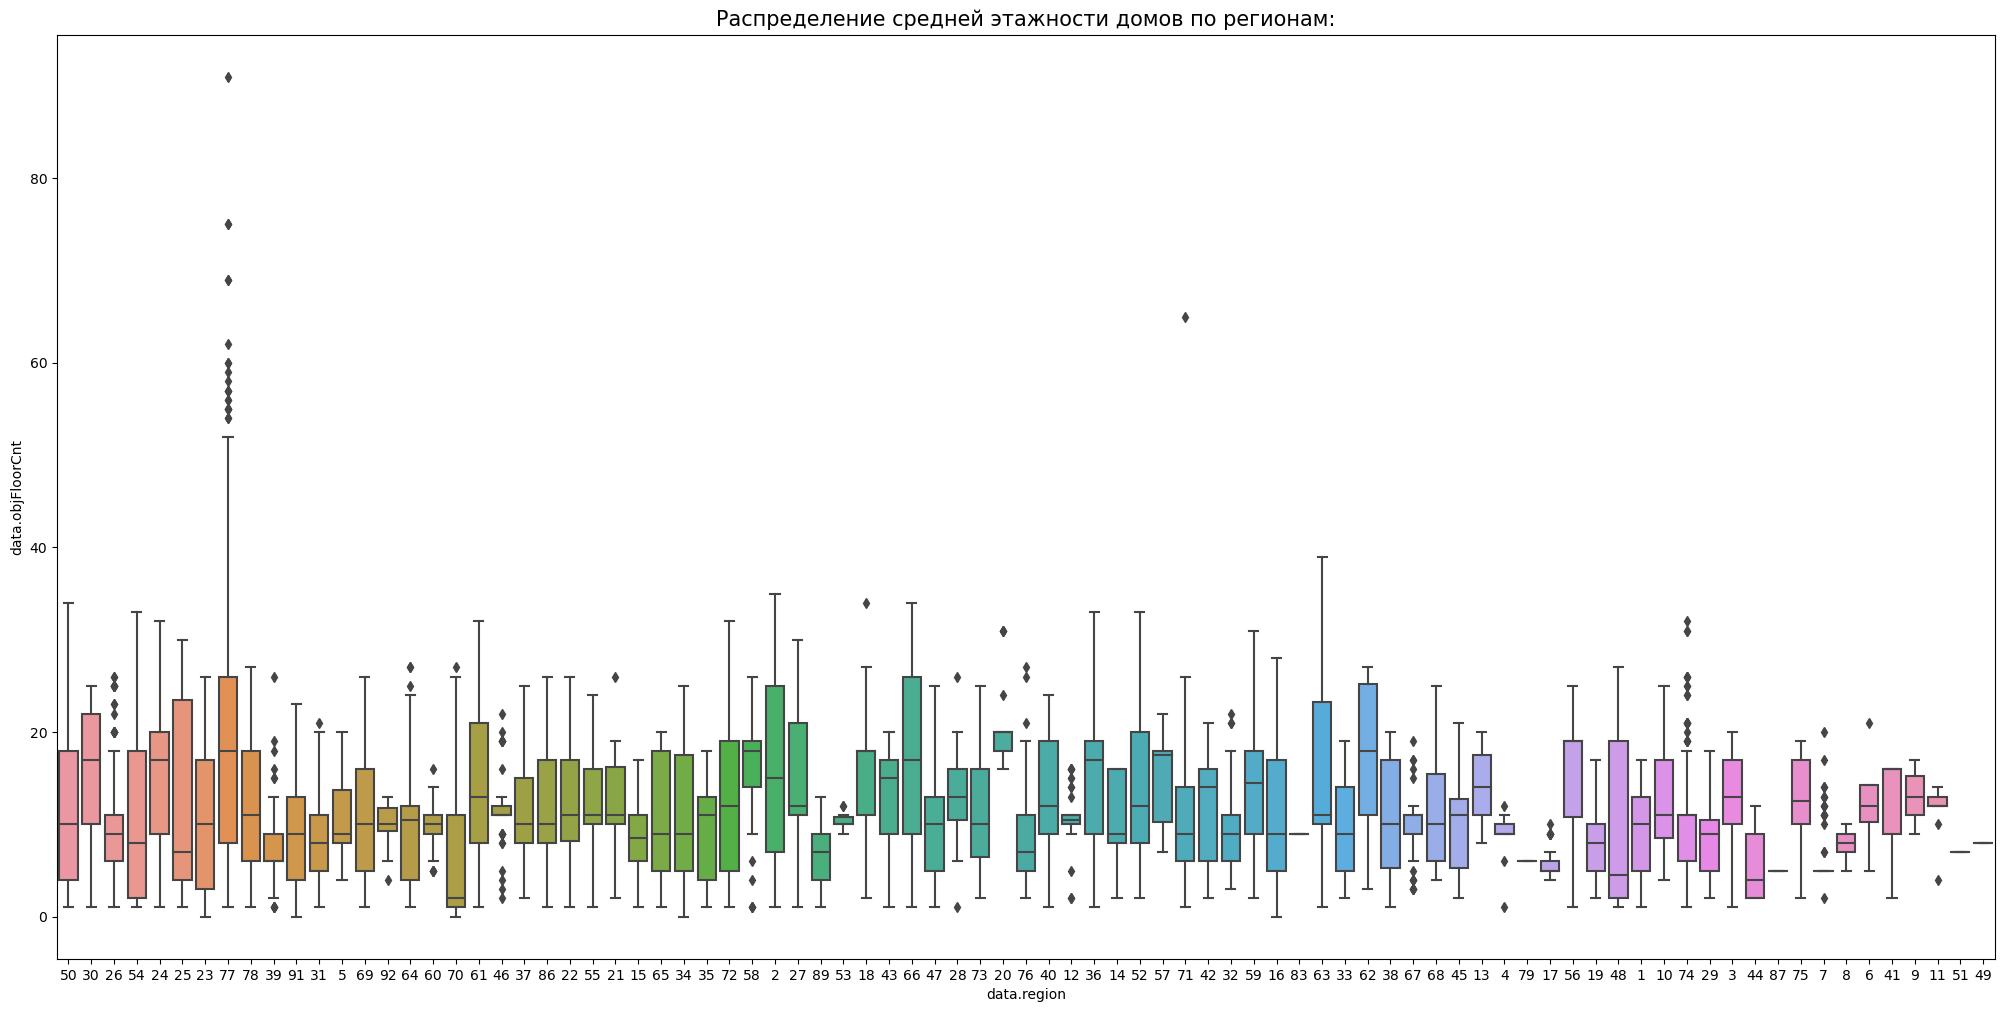

In [17]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df.sort_values('data.objReady100PercDt'),
            x='data.region',
            y='data.objFloorCnt')
plt.title('Распределение средней этажности домов по регионам:', size=15);

# 5. Распределение кол-ва парковочных мест у новостроек по регионам

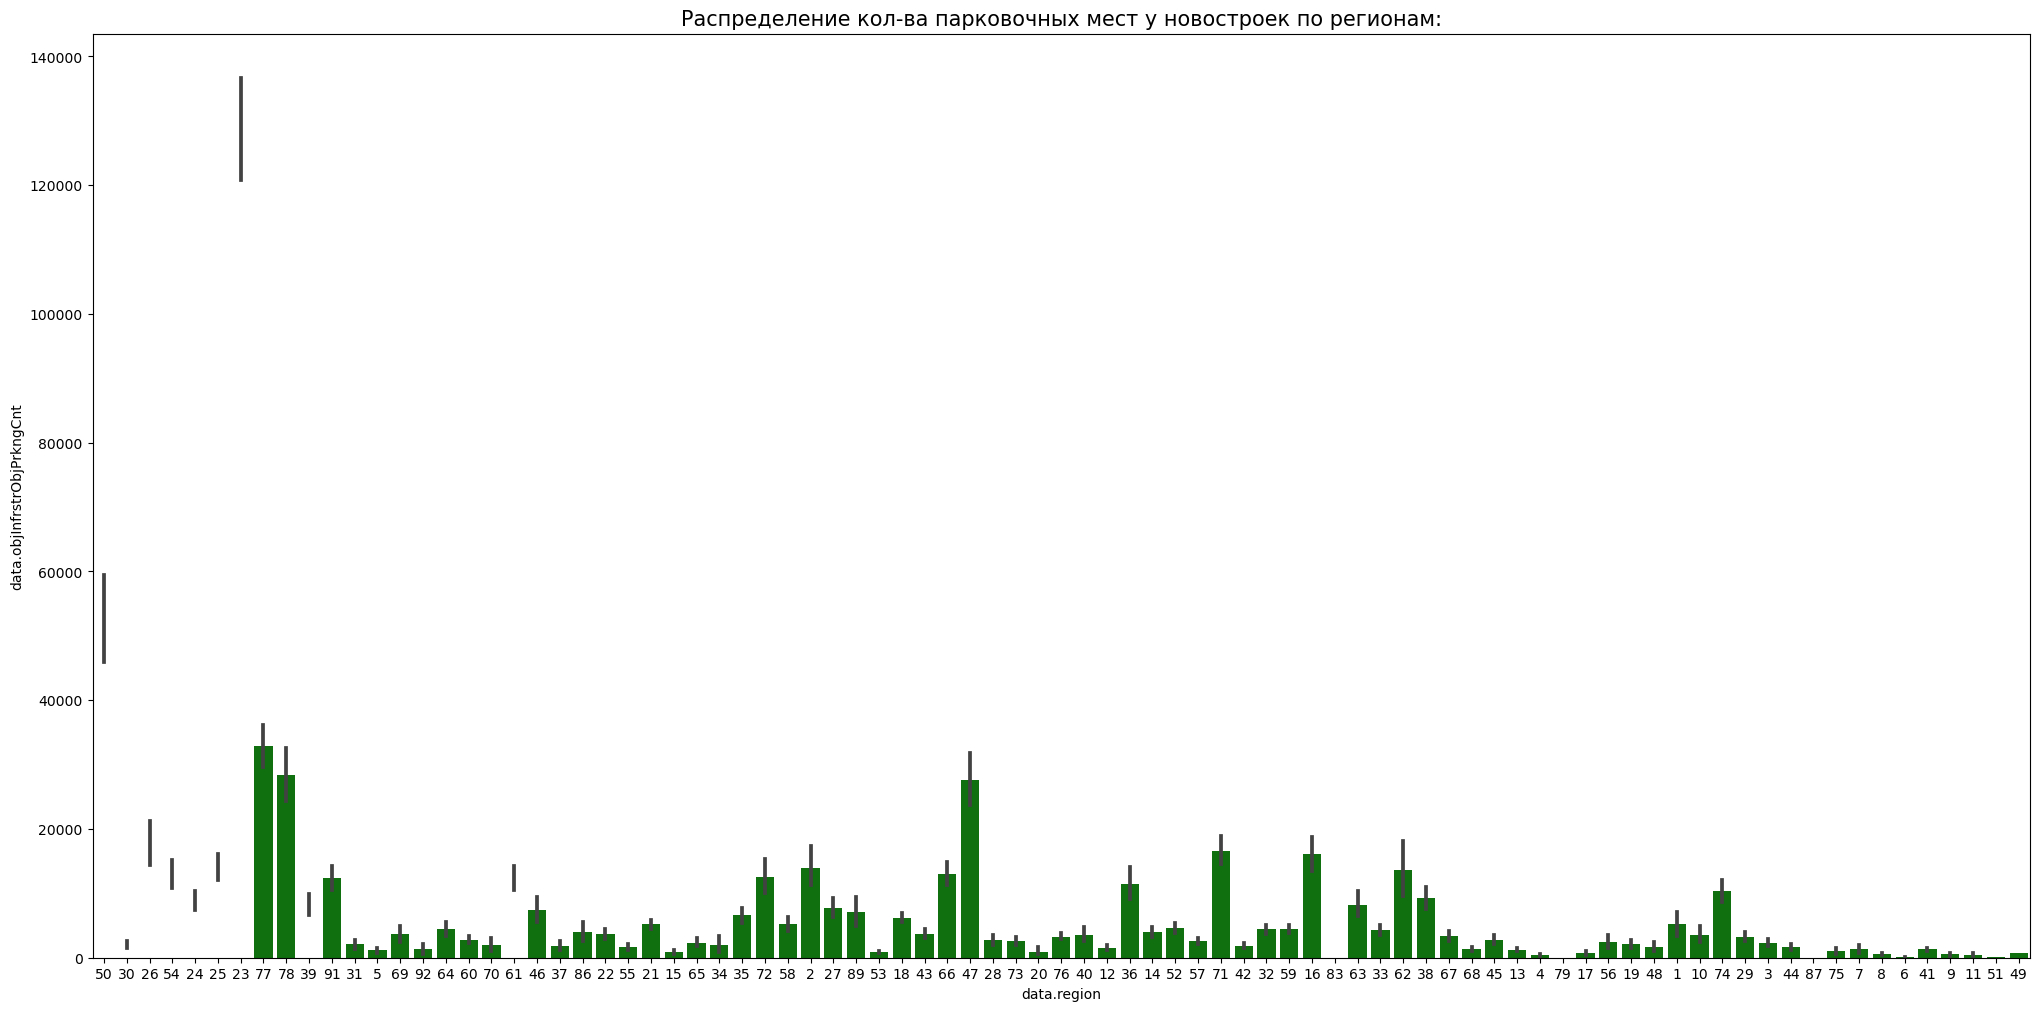

In [18]:
plt.figure(figsize=(25,12))
sns.barplot(data=df.sort_values('data.objReady100PercDt'),
            x='data.region',
            y='data.objInfrstrObjPrkngCnt',
            estimator=sum,
           color='g')
plt.title('Распределение кол-ва парковочных мест у новостроек по регионам:', size=15);

# Выводы
1.ТОП-3 региона по средней цене за кв.м.:
   г.Москва
   г.Санкт-Петербург
   Камчатский край;
ВОТТОМ:
   Кабардино-Балкарская республика
   Республика Ингушетия
   Чеченская песпублика

2. Самая большая цена за кв.м жилья в классе "Элитное" зафиксировано в г. Москва.